<a href="https://colab.research.google.com/github/Anoushehm/intro-ml-course-winter2026/blob/main/2_HAD5016_S26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Programmer:** Valeria, Urim


# 0. Setup

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

#1. Import data and explore


Number of duplicate rows in df:
0
Number of duplicate ids in df:
0
Number of missing values per column:
id                  0
gender              0
age                 0
hypertension        0
heart_disease       0
ever_married        0
employment          0
residence_type      0
random_glucose      0
bmi               181
smoking_status      0
stroke              0
dtype: int64
Percentage of observations with heart disease: 6.46%


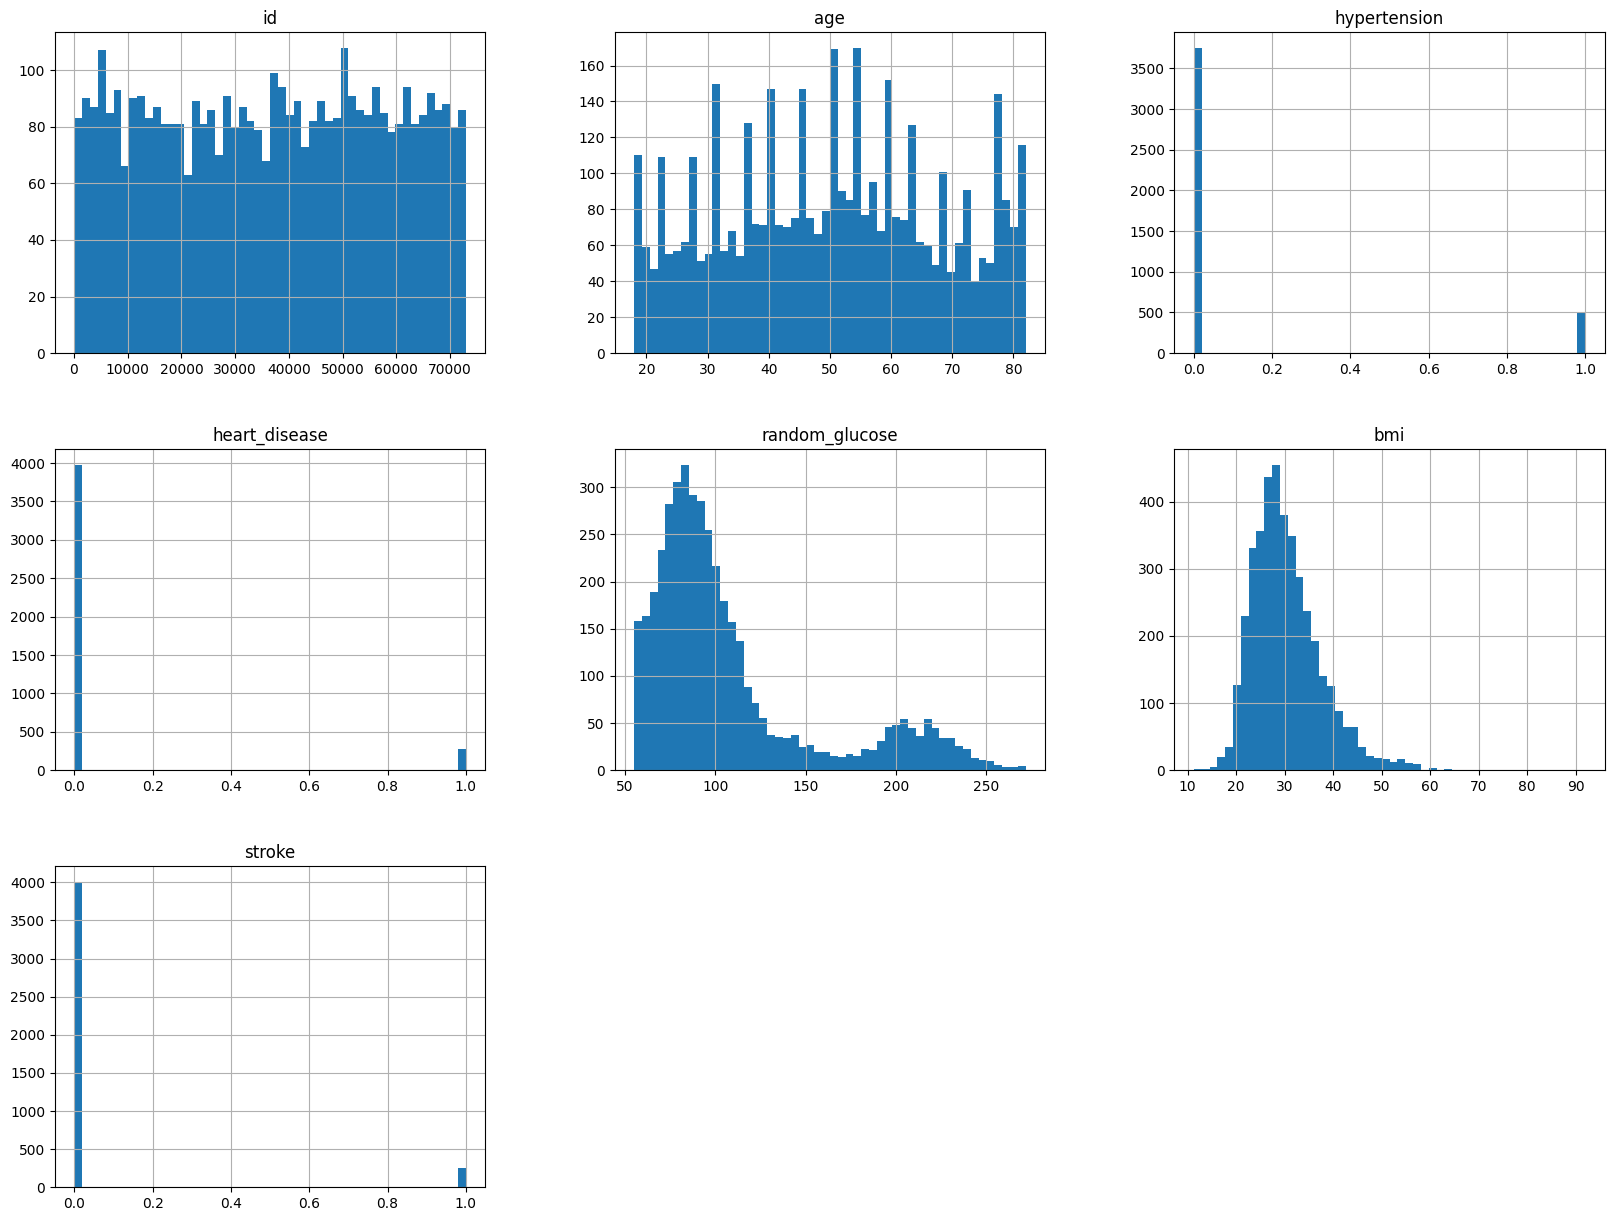

Unique values for gender:
['Male' 'Female' 'Other']
Unique values for ever_married:
['Yes' 'No']
Unique values for employment:
['Private Sector' 'Self-employed' 'Public Sector' 'Unemployed']
Unique values for residence_type:
['Urban' 'Rural']
Unique values for smoking_status:
['Former Smoker' 'Never Smoker' 'Active Smoker' 'Unknown']


In [ ]:
# Import data from Google Drive
url = 'https://raw.githubusercontent.com/Anoushehm/intro-ml-course-winter2026/refs/heads/main/Datathon%20%232%20-%20Cardiovascular%20Health.csv'
df = pd.read_csv(url)

# Read the dataset into a Pandas DataFrame
df.head()

# Check if there are any duplicates in the dataset
print('Number of duplicate rows in df:')
print(df.duplicated().sum())

# Check if there are any duplicares in terms of id
print('Number of duplicate ids in df:')
print(df['id'].duplicated().sum())

# Check if there any missing data across all variables
print('Number of missing values per column:')
print(df.isnull().sum())

# Calculate the percentage of observation with heart disease (==1)
heart_disease_percentage = (df['heart_disease'].value_counts(normalize=True) * 100).loc[1]
print(f"Percentage of observations with heart disease: {heart_disease_percentage:.2f}%")

# Plot histogram for all variables to check for outliers
df.hist(bins=50, figsize=(20,15))
plt.show()

# Give a summary table for all variables
df.describe()

# Check the values of categorical variables (gender, ever_married, employment, residence_type, smoking_status)
print('Unique values for gender:')
print(df['gender'].unique())
print('Unique values for ever_married:')
print(df['ever_married'].unique())
print('Unique values for employment:')
print(df['employment'].unique())
print('Unique values for residence_type:')
print(df['residence_type'].unique())
print('Unique values for smoking_status:')
print(df['smoking_status'].unique())


# 2. Create a clean version of data for analysis

In [ ]:
# Drop observations with missing BMIs and save it in df_clean
#df_clean = df.dropna(subset=['bmi'])
#df_clean.describe()

# Count the number of observations
#print(f"Number of observations in df_clean: {len(df_clean)}")

# Encode categorical variables to numericals
#df_clean['gender'] = df_clean['gender'].map({'Female': 1, 'Male': 2, 'Other': 3})
#df_clean['ever_married'] = df_clean['ever_married'].map({'No': 0, 'Yes': 1})
#df_clean['residence_type'] = df_clean['residence_type'].map({'Urban': 1, 'Rural': 2})
#df_clean['smoking_status'] = df_clean['smoking_status'].map({'Never Smoker': 0, 'Unknown': 1, 'Former Smoker': 2, 'Active Smoker': 3})
#df_clean['employment'] = df_clean['employment'].map({'Self-employed': 1, 'Private Sector': 2, 'Public Sector': 3, 'Unemployed': 4})



In [ ]:
# Drop observations with missing data
df_clean = df.dropna()
df_clean = df_clean.drop(columns=['id'])

df_clean.shape
print(f"Number of observations in df_clean: {len(df_clean)}")

# Encode categorical variables to numericals
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other' : pd.NA})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df['employment'] = df['employment'].map({'Unemployed': 0, 'Private Sector': 1, 'Public Sector': 1, 'Self-employed': 1})
df['residence_type'] = df['residence_type'].map({'Rural': 0, 'Urban': 1})
df['smoking_status'] = df['smoking_status'].map({'Active Smoker': 1, 'Never Smoker': 0, 'Former Smoker': 0, 'Unknown': pd.NA})


id                  0
gender              0
age                 0
hypertension        0
heart_disease       0
ever_married        0
employment          0
residence_type      0
random_glucose      0
bmi               181
smoking_status      0
stroke              0
dtype: int64
Number of observations in df_clean: 4073


# 3. Preparing the data

In [ ]:
# Split the data into features and target variable
X = df_clean.drop('heart_disease', axis=1)
y = df_clean['heart_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)        # transform the test set

# 4. Check for collinearity

# 5. Run logistic regression

In [ ]:
# Urim
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Urim
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[602   0]
 [ 48   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       602
           1       1.00      0.02      0.04        49

    accuracy                           0.93       651
   macro avg       0.96      0.51      0.50       651
weighted avg       0.93      0.93      0.89       651



In [ ]:
# --- Logistic regression using df_clean (assumes df_clean already exists) ---

# Define X (predictors) and y (outcome)
X = df_clean[['hypertension']]
y = df_clean['heart_disease']

# Fit logistic regression
log_reg = LogisticRegression()
log_reg.fit(X, y)


# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# Predictions
log_reg_preds = log_reg.predict(X)

# Visualisation
fig, axs = plt.subplots(1, 1, figsize=(7, 6))

sns.regplot(
    x='employment',
    y='heart_disease',
    data=df_clean,
    logistic=True,
    ci=None,
    ax=axs
)

axs.set_title('Logistic Regression: Employment → Heart Disease')
plt.show()

# Performance metric
print("Logistic Regression Accuracy:", accuracy_score(y, log_reg_preds))


# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(data[['employment', 'heart_disease']], data['df_clean'])
log_reg_preds = log_reg.predict(data[['employment', 'heart_disease']])

# Visualization
fig, axs = plt.subplots(1, 1, figsize=(7, 6))

# Logistic Regression Visualization
sns.regplot(x='heart_disease', y='df_clean', data=data, logistic=True, ci=None, ax=axs,
            line_kws={"color": "#e0d122", "lw": 3}, scatter_kws={"color": "#7569c9",
"s": 50})
axs.set_title('Logistic Regression')
plt.show()

# Performance Metrics
print("Logistic Regression Accuracy: ", accuracy_score(data['df_clean'],
log_reg_preds))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: X has 1 features, but LogisticRegression is expecting 10 features as input.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist

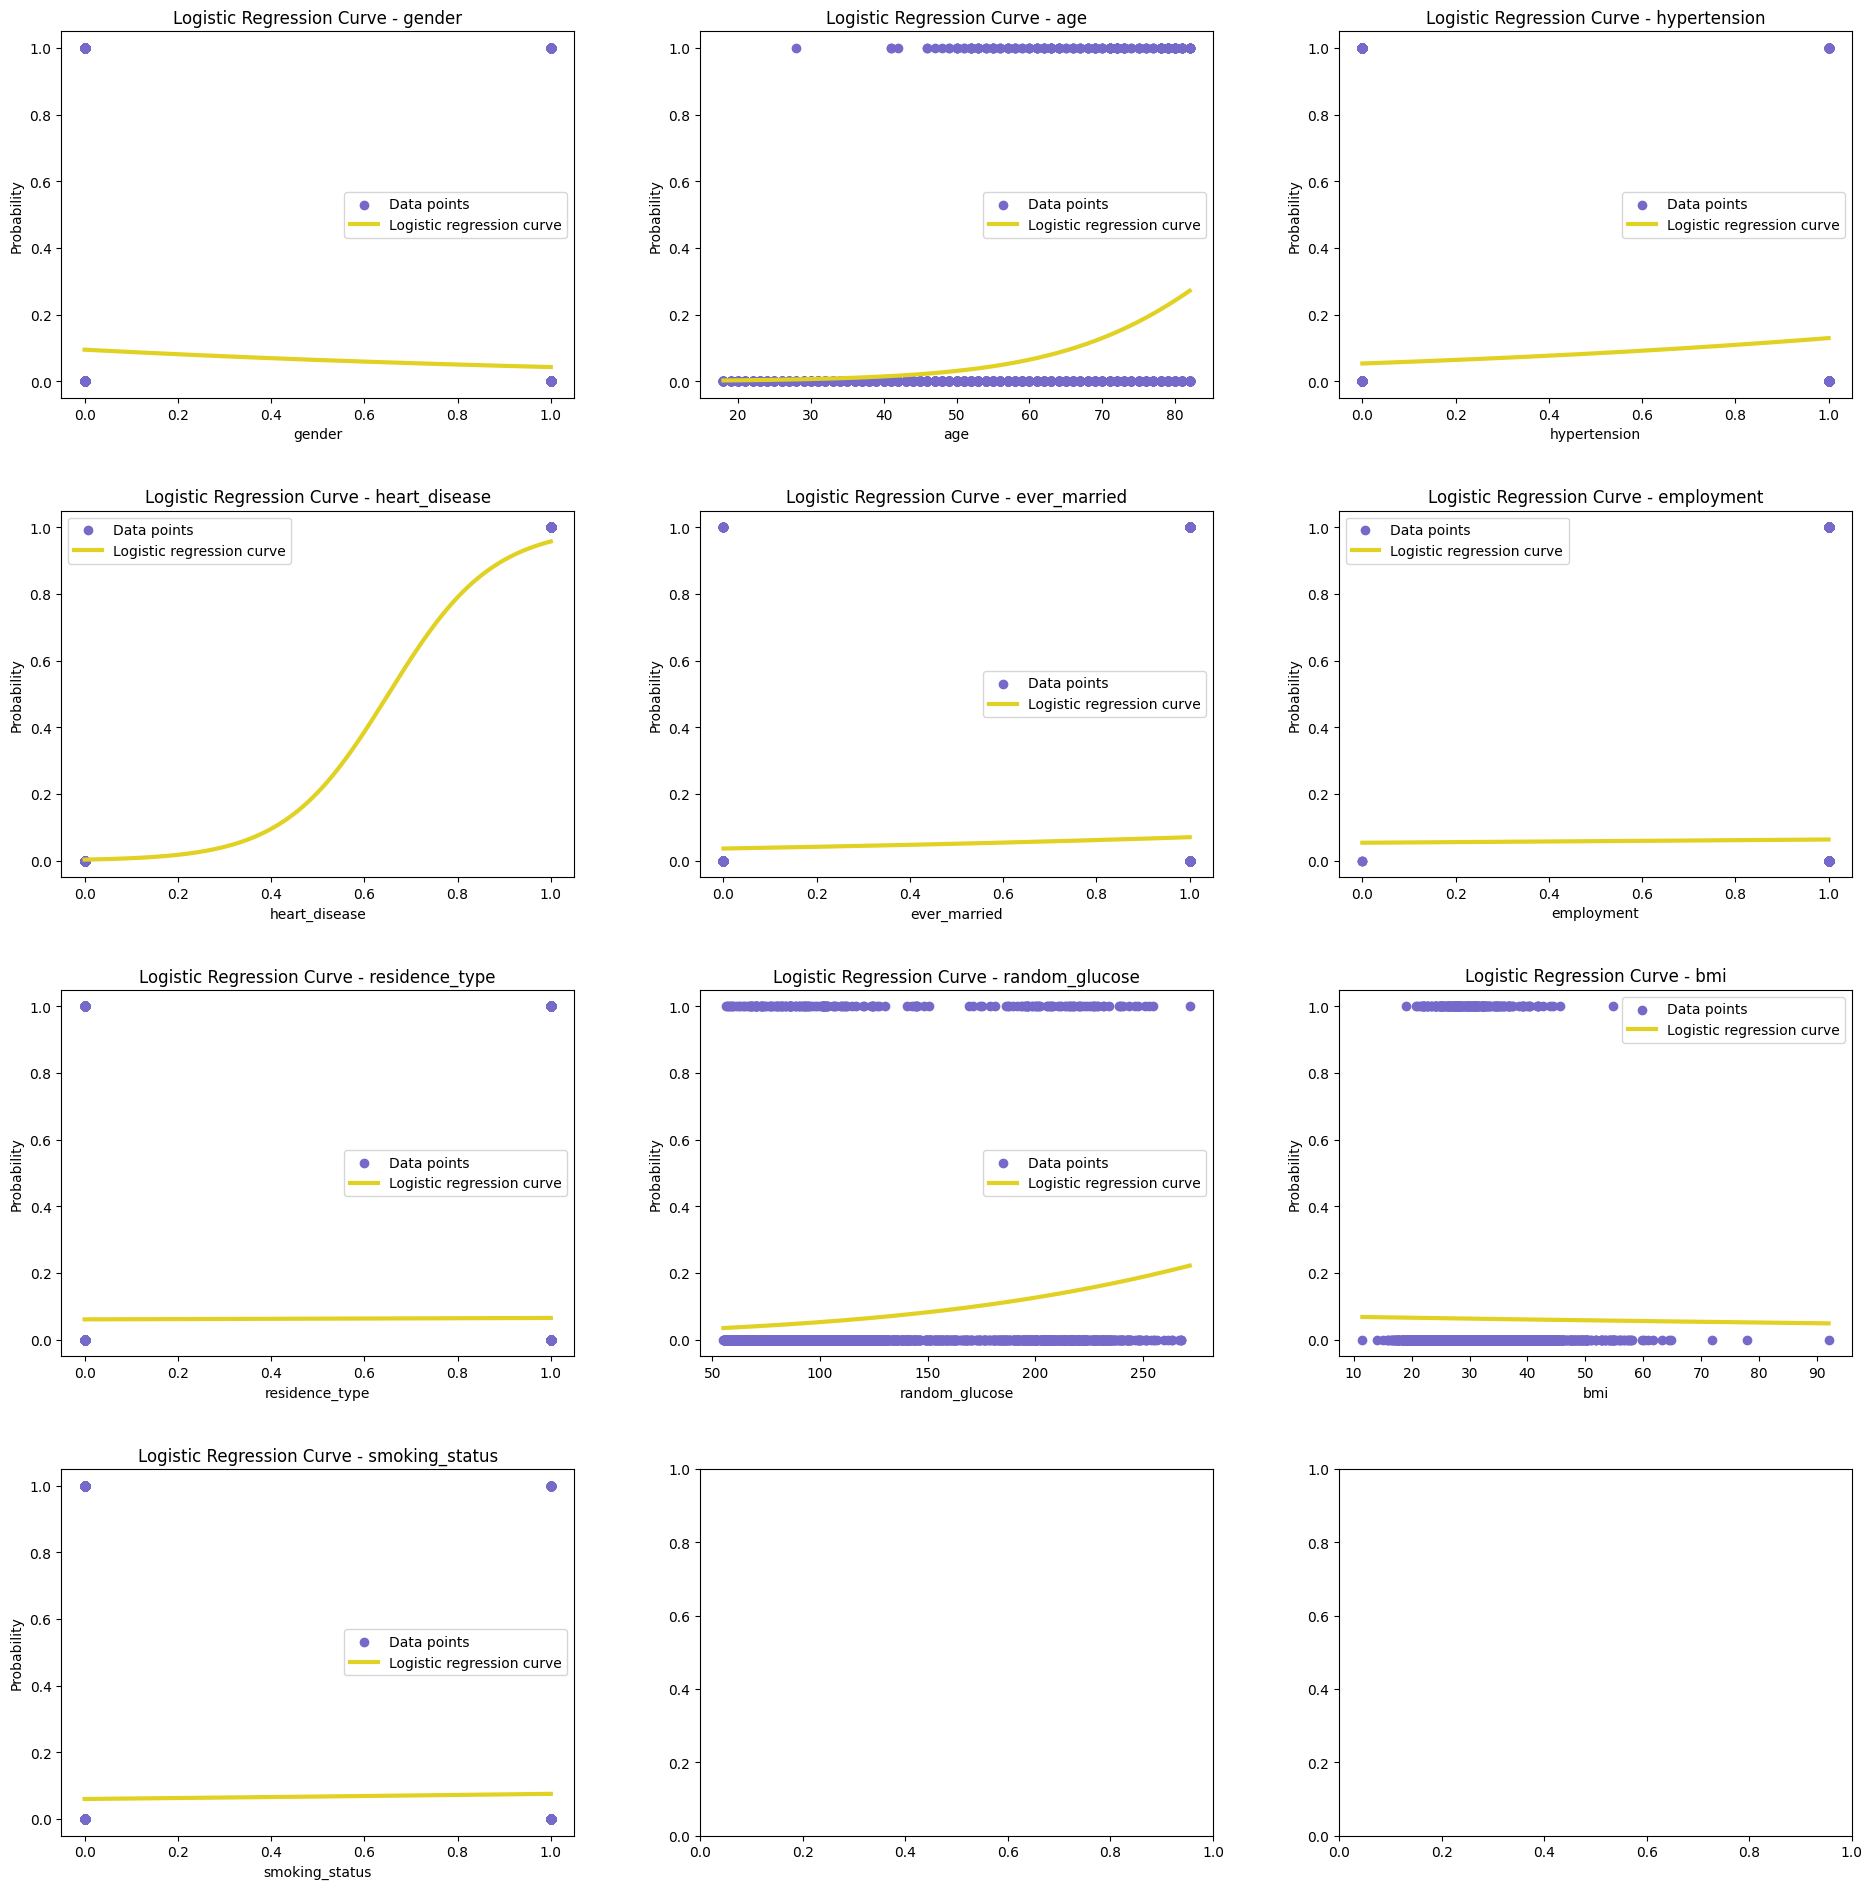

In [ ]:
# Create logistic regression object
log_reg = LogisticRegression()

fig, axs = plt.subplots(4, 3, figsize=(20, 20))
fig.tight_layout(pad=6.0)  # Adds padding between subplots

for i, feature in enumerate(df_clean.columns[:-1]):  # Exclude 'Outcome' column
    row = i // 3 # Determine row index
    col = i % 3   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = df_clean[[feature]]
    y = df_clean['heart_disease']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()

# 6. Regularization

In [ ]:
#